<a href="https://colab.research.google.com/github/sharvani1357/PCA/blob/main/iris_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
iris=load_iris()

In [ ]:
x=iris.data
y=iris.target

In [ ]:
x_scaled=StandardScaler().fit_transform(x)

In [ ]:
x.shape

(150, 4)

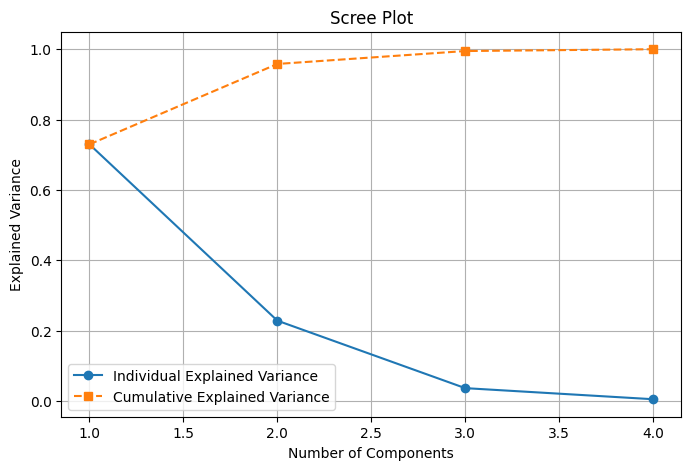

In [ ]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(x_scaled)

# Scree Plot
plt.figure(figsize=(8,5))

# Individual explained variance
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    pca.explained_variance_ratio_,
    'o-',
    label="Individual Explained Variance"
)

# Cumulative explained variance
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    np.cumsum(pca.explained_variance_ratio_),
    's--',
    label="Cumulative Explained Variance"
)

plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.title("Scree Plot")
plt.grid(True)
plt.legend()
plt.show()

## choose number of components (95% variance)

In [ ]:
pca_95=PCA(n_components=0.95)
x_reduced=pca_95.fit_transform(x_scaled)
print(f"Reduced shape:{x_reduced.shape}")

Reduced shape:(150, 2)


## Visualize Top 2 Components

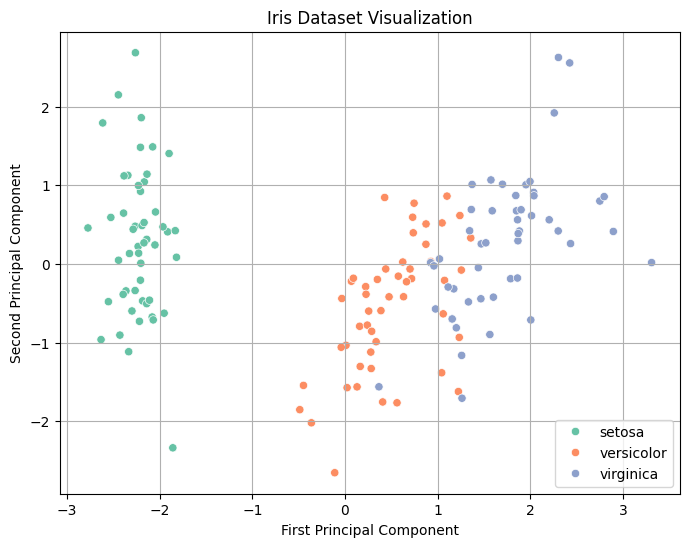

In [ ]:
pca_25=PCA(n_components=2)
x_2d=pca_25.fit_transform(x_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=x_2d[:,0],y=x_2d[:,1],hue=iris.target_names[y],palette='Set2')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Iris Dataset Visualization')
plt.grid()
plt.show()